In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [4]:
df = pd.read_csv("Classified Data", index_col=0)
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale  = ["WTT","PTI","EQW","SBI","LQE","QWG","FDJ","PJF","HQE","NXJ"]

for col in cols_to_scale:
    df[col] = scaler.fit_transform(np.array([df[col]]).T)

In [6]:
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.477912  0.517593  0.255846  0.446856  0.348797  0.064235  0.327526   
1  0.298068  0.403864  0.234836  0.490999  0.456119  0.274872  0.268036   
2  0.353470  0.545904  0.483996  0.509837  0.907533  0.326371  0.938657   
3  0.684900  0.678940  0.310686  0.490986  0.619742  0.436264  0.785889   
4  0.714167  0.365101  0.294082  0.392456  0.687196  0.314229  0.578492   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.231719  0.338214  0.471767             1  
1  0.480550  0.168622  0.680091             0  
2  0.575397  0.389811  0.514970             0  
3  0.727165  0.761269  0.409326             1  
4  0.233666  0.722546  0.621463             1

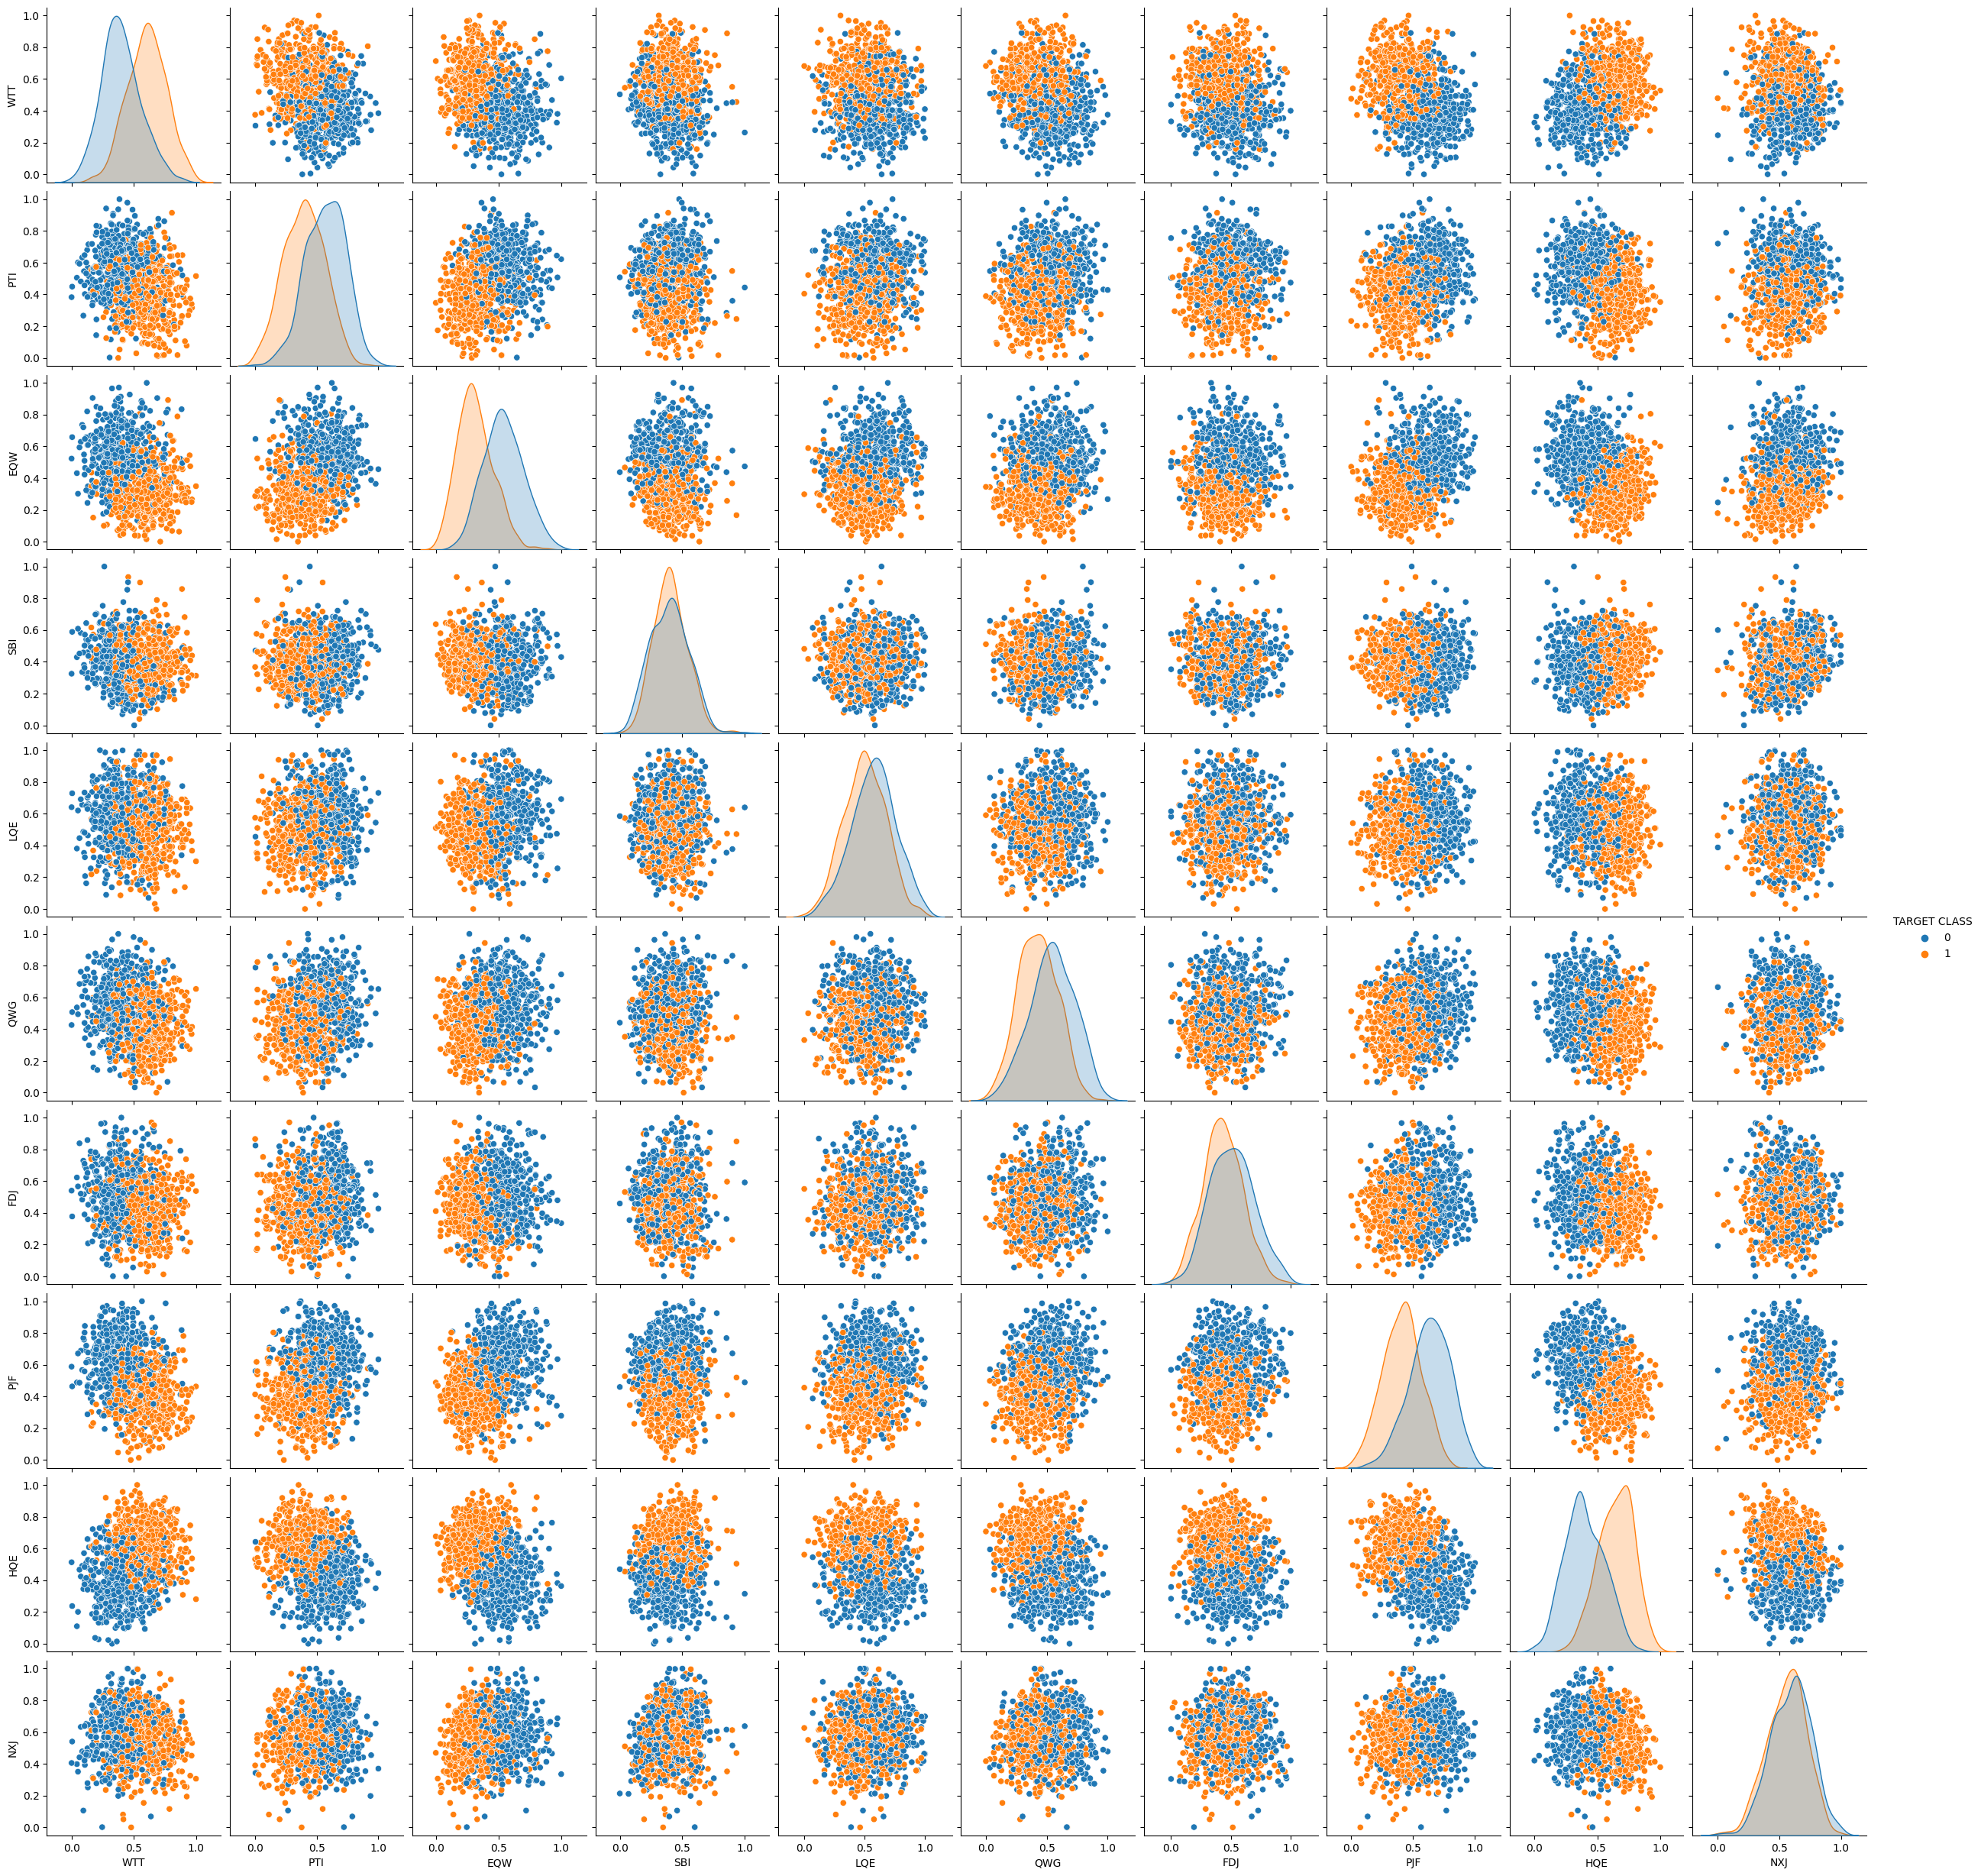

In [7]:
sb.pairplot(df , hue="TARGET CLASS")

In [12]:
scaled_feature = df.drop(["TARGET CLASS"],axis="columns")

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_feature, df["TARGET CLASS"], test_size=0.3, random_state=42)

In [14]:
X_train.shape

(700, 10)

In [16]:
X_test.shape

(300, 10)

In [17]:
y_train.shape

(700,)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train , y_train)


KNeighborsClassifier(n_neighbors=1)

In [20]:
pred = knn.predict(X_test)

In [22]:
knn.score(X_test,y_test)

0.9333333333333333

In [23]:
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import cross_val_score

In [25]:
print(confusion_matrix(y_test,pred))

[[134   8]
 [ 12 146]]


In [26]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       146
           1       0.92      0.95      0.94       154

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [27]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,scaled_feature,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())

In [28]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,scaled_feature,df['TARGET CLASS'],cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Accuracy Rate')

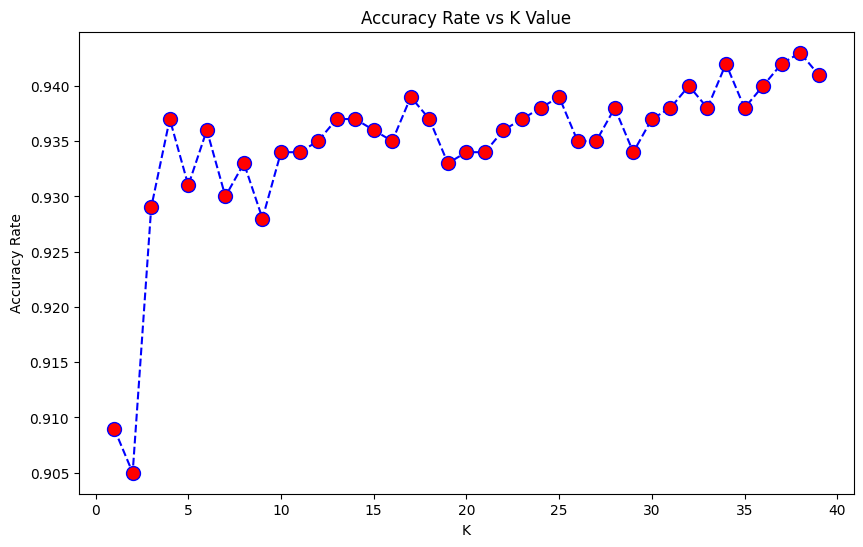

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy_rate, c="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Accuracy Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy Rate")

Text(0, 0.5, 'Error Rate')

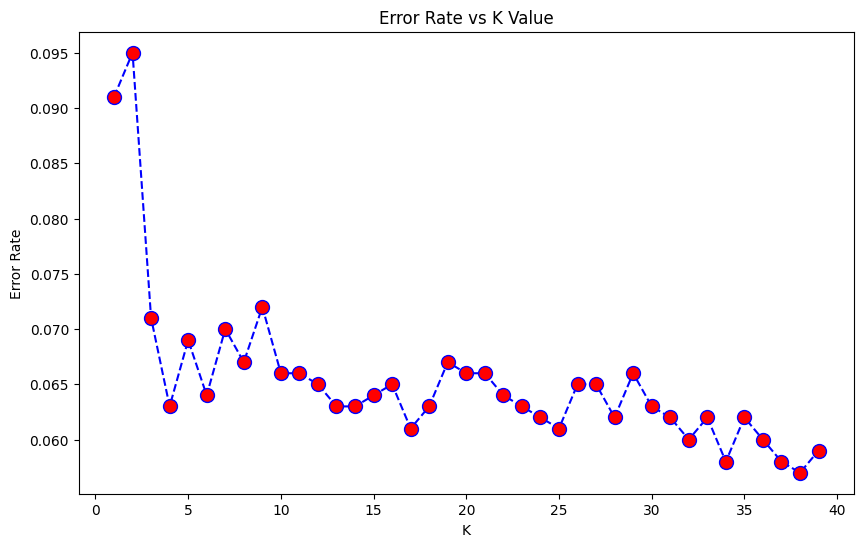

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, c="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [32]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.95

In [45]:
pred = knn.predict(X_test)

In [46]:
print(confusion_matrix(y_test,pred))

[[134   8]
 [  9 149]]
